Adapted from https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/

## fit a single model

In [2]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
%matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

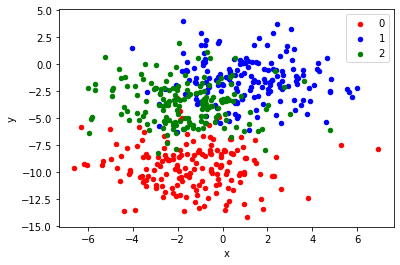

In [3]:
# visualize data

from pandas import DataFrame

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train: 0.833, Test: 0.769


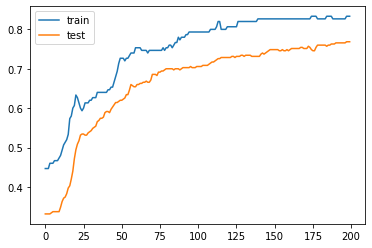

In [5]:
# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## demonstrate high variance of mlp model 

> 0.734
> 0.771
> 0.771
> 0.754
> 0.751
> 0.771
> 0.763
> 0.783
> 0.777
> 0.769
> 0.766
> 0.754
> 0.740
> 0.760
> 0.771
> 0.789
> 0.766
> 0.757
> 0.769
> 0.743
Scores Mean: 0.763, Standard Deviation: 0.014


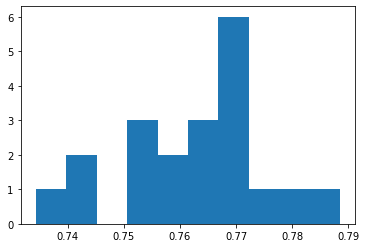

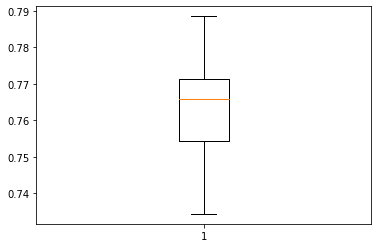

In [6]:

from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot
 
# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return test_acc
 

# repeated evaluation
n_repeats = 20
scores = list()
for _ in range(n_repeats):
    score = evaluate_model(trainX, trainy, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))
# histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

## ensemle models

In [9]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
    # make prediction
    yhat = ensemble_predictions(members, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

In [10]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)

# repeated evaluation
n_repeats = 20
n_members = 5
scores = list()
for _ in range(n_repeats):
    # fit all models
    members= [fit_model(trainX, trainy) for _ in range(n_members)]
    # evaluate ensemble
    score = evaluate_members(members, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.771
> 0.771
> 0.763
> 0.771
> 0.777
> 0.769
> 0.777
> 0.763
> 0.771
> 0.757
> 0.763
> 0.769
> 0.769
> 0.783
> 0.763
> 0.769
> 0.754
> 0.749
> 0.757
> 0.777
Scores Mean: 0.767, Standard Deviation: 0.008


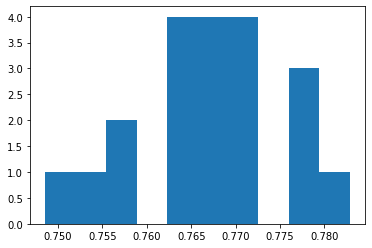

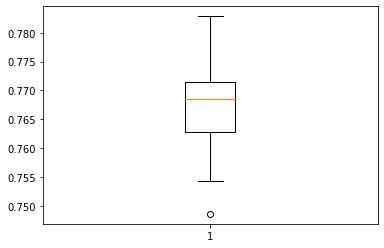

In [11]:
#show Variance of MLP Model

from matplotlib import pyplot
%matplotlib inline

pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()